 # VISUALIZACIÓN
 

## IMPORTACIONES

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import regex as re


In [2]:
!pwd

/Users/jaimecabanyes/Desktop/IRON_HACK/Trabajos IH/W3


In [3]:
ascensos_final = pd.read_csv("Data/ascensos_everest_final.csv")

## PEQUEÑOS DATAFRAMES DEL DATAFRAME ORIGINAL

In [4]:
ascensos_final

,Unnamed: 0,Peak,Name,Citizenship,Sex,Age,Oxy,Dth,Host,Year,Season,Month,Day,Time
0,0,EVER,Tenzing Norgay,India,M,39.0,Yes,No,Nepal,1953,Spr,May,29,11:30
1,1,EVER,Edmund Percival Hillary,New Zealand,M,33.0,Yes,No,Nepal,1953,Spr,May,29,11:30
2,2,EVER,Juerg P. Marmet,Switzerland,M,28.0,Yes,No,Nepal,1956,Spr,May,23,14:00
3,3,EVER,Ernst Schmied,Switzerland,M,31.0,Yes,No,Nepal,1956,Spr,May,23,14:00
4,4,EVER,Adolf (Dolf) Reist,Switzerland,M,35.0,Yes,No,Nepal,1956,Spr,May,24,11:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10179,10179,EVER,Xiao-Lin Li,China,M,35.0,Yes,No,China,2020,Spr,May,28,NaN
10180,10180,EVER,Xin-Guo Li,China,M,NaN,Yes,No,China,2020,Spr,May,28,NaN
10181,10181,EVER,Ping Liu,China,F,39.0,Yes,No,China,2020,Spr,May,28,NaN
10182,10182,EVER,Ying Ma,China,F,42.0,Yes,No,China,2020,Spr,May,28,NaN


In [5]:
df_citizenship_común = ascensos_final[ascensos_final['Citizenship'].map(ascensos_final['Citizenship'].value_counts()) > 75]
#Dataframe incluyendo solo las nacionalidades mas frecuentes.

In [6]:
df_citizenship_común1 = ascensos_final[ascensos_final["Citizenship"] != "Nepal"]
#Dataframe icluyendo las nacionalidades mas frecuentes y excluyendo Nepal.

In [7]:
df_no_may = ascensos_final[ascensos_final["Month"] != "May"]
#Dataframe excluyendo Mayo

In [8]:
df_no_oxígeno = ascensos_final[ascensos_final["Oxy"] != "Yes"]
#Dataframe excluyendo el uso de oxígeno

In [9]:
df_Time_común = ascensos_final[ascensos_final['Time'].map(ascensos_final['Time'].value_counts()) > 25]
#Dataframe incluyendo las horas de llegada mas comunes

In [10]:
df_Time_común1 = df_Time_común.sort_values(by="Time", ascending=True)
#Dataframe incluyendo las horas de llegada mas comunes en orden ascendente

In [11]:
df_muertes = ascensos_final[ascensos_final["Dth"] != "No"]
#Dataframe de los muertos que hayan hecho cima en en everest

In [37]:
df_mejores_alpinistas = ascensos_final[ascensos_final['Name'].map(ascensos_final['Name'].value_counts()) > 20]

## DISPLAY DE LOS  GRÀFICOS

In [13]:
sns.set_context("poster")
sns.set(rc={"figure.figsize": (14.,8.)})
sns.set_style("whitegrid")

## DISTRIBUCIONES 

<AxesSubplot:ylabel='Name'>

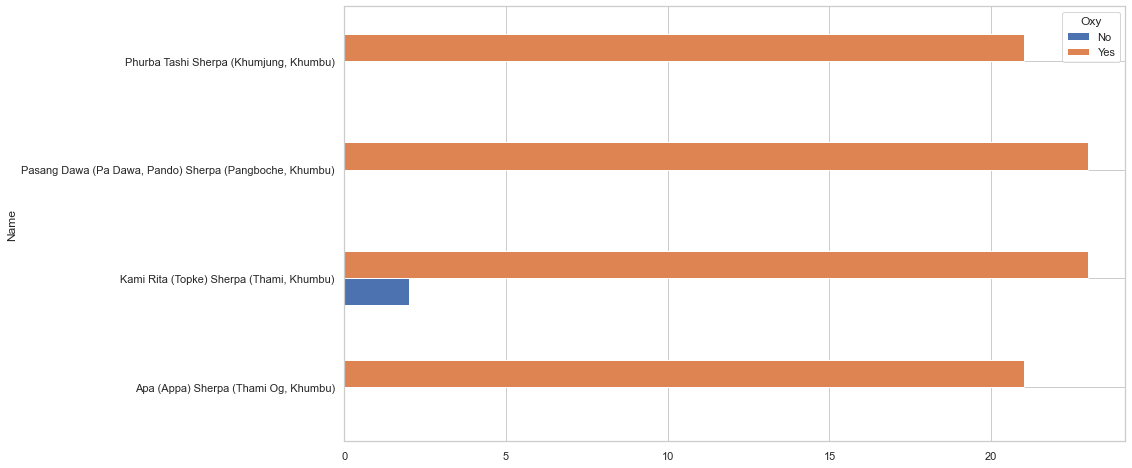

In [44]:
df_mejores_alpinistas.groupby(["Name", "Oxy"])["Oxy"].count().unstack().plot(kind="barh")

### MUERTES

In [14]:
Datos1 = ascensos_final["Dth"].value_counts()

Text(0.5, 1.0, 'Death Rate')

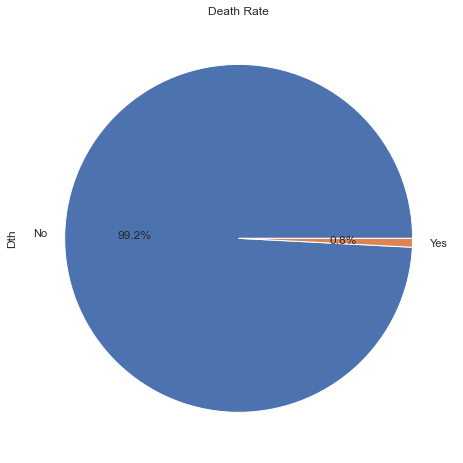

In [15]:
Datos1.plot.pie(autopct="%.1f%%")
plt.title('Death Rate')

Text(0.5, 1.0, 'Total Deaths')

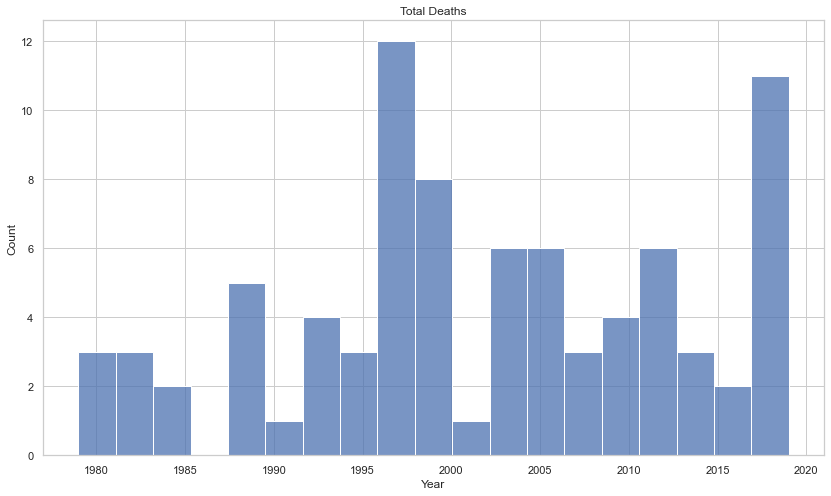

In [16]:
sns.histplot(x=df_muertes.Year, bins=19)
plt.title('Total Deaths')

### DISTRIBUCIÓN DE ALPINISTAS POR EDAD

Text(0.5, 1.0, 'Age Distribution')

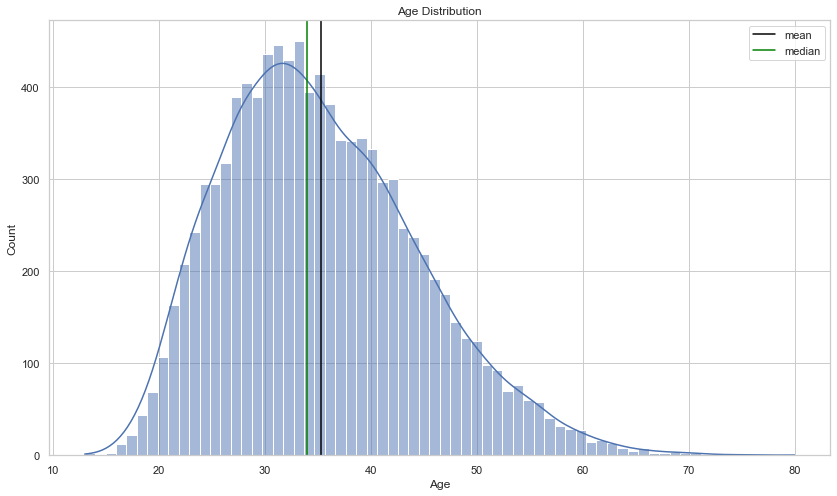

In [17]:
graf = sns.histplot(x=ascensos_final.Age, kde=True, bins = 68)
graf.axvline(x=ascensos_final.Age.dropna().mean(), c="black", label="mean")
graf.axvline(x=ascensos_final.Age.dropna().median(), c="green", label="median")
plt.legend()
plt.title('Age Distribution')

### USO DE OXÍGENO

In [18]:
Datos = ascensos_final["Oxy"].value_counts()

Text(0.5, 1.0, 'Oxygen Use')

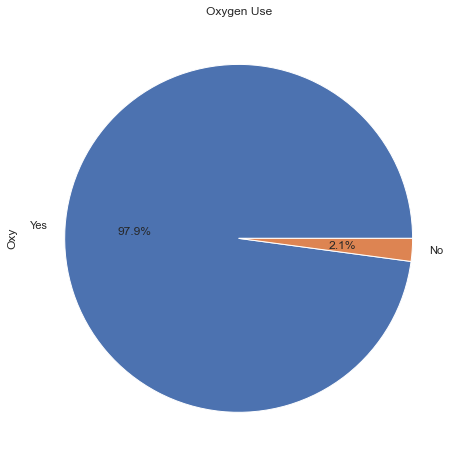

In [19]:
Datos.plot.pie(autopct="%.1f%%")
plt.title('Oxygen Use')

Text(0.5, 1.0, 'Year Expeditions with/without Oxygen')

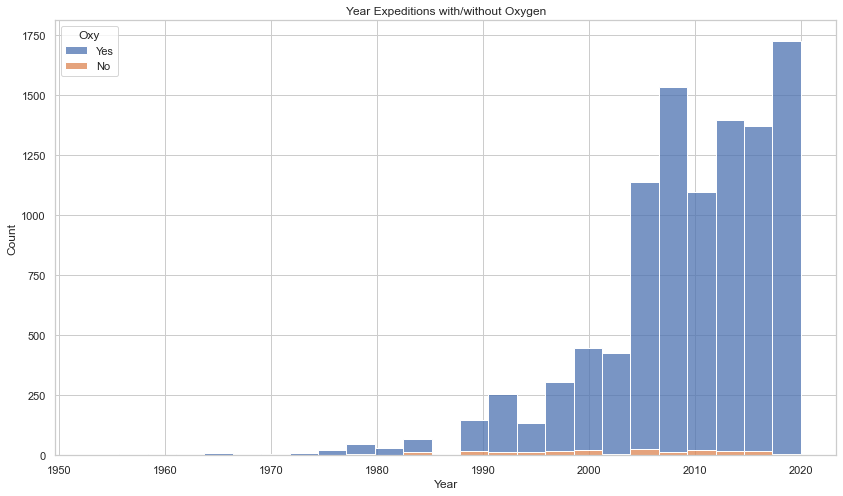

In [20]:
sns.histplot(data=ascensos_final, x="Year", hue="Oxy", multiple="stack", bins=25)
plt.title('Year Expeditions with/without Oxygen')

Text(0.5, 1.0, 'No Oxygen Rises')

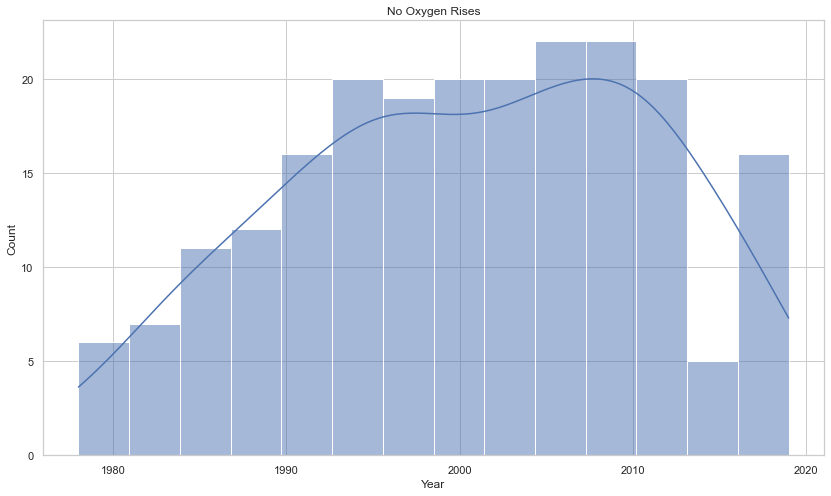

In [21]:
sns.histplot(data=df_no_oxígeno, x="Year", bins=14, kde=True)
plt.title('No Oxygen Rises')

### COMPARACIÓN EDAD CON MUERTE/GÉNERO

<AxesSubplot:xlabel='Sex', ylabel='Age'>

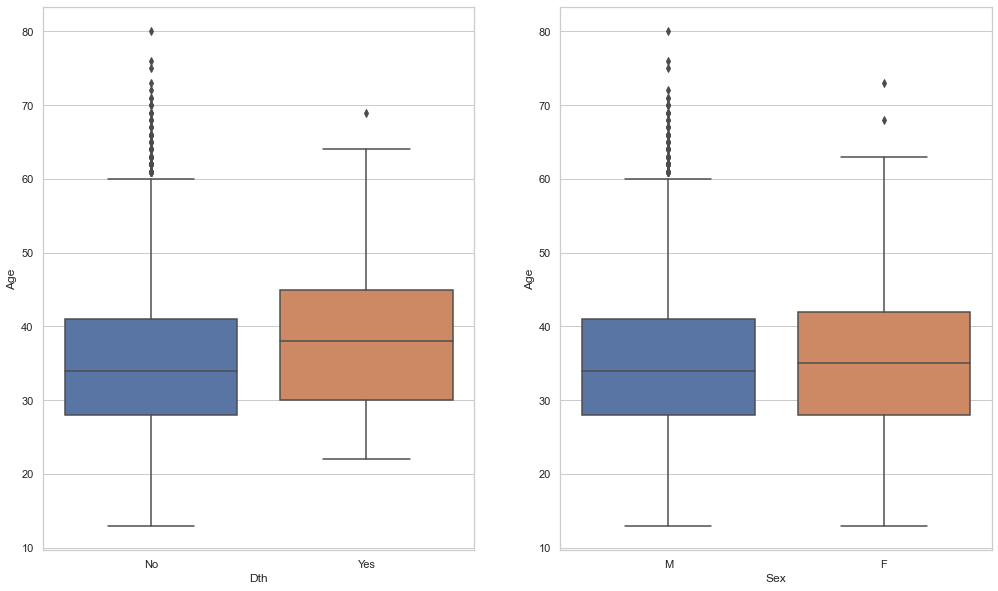

In [22]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(17,10))
sns.boxplot(x="Dth", y="Age", data=ascensos_final, ax=ax[0])
sns.boxplot(x="Sex", y="Age", data=ascensos_final, ax=ax[1])

### DDISTRIBUCIÓN POR MES

In [23]:
Datos1 = ascensos_final["Month"].value_counts()

In [24]:
Datos1

May    9673
Oct     241
Jun     152
Apr      48
Sep      46
Dec      13
Aug       9
Feb       2
Name: Month, dtype: int64

<AxesSubplot:xlabel='Month', ylabel='Count'>

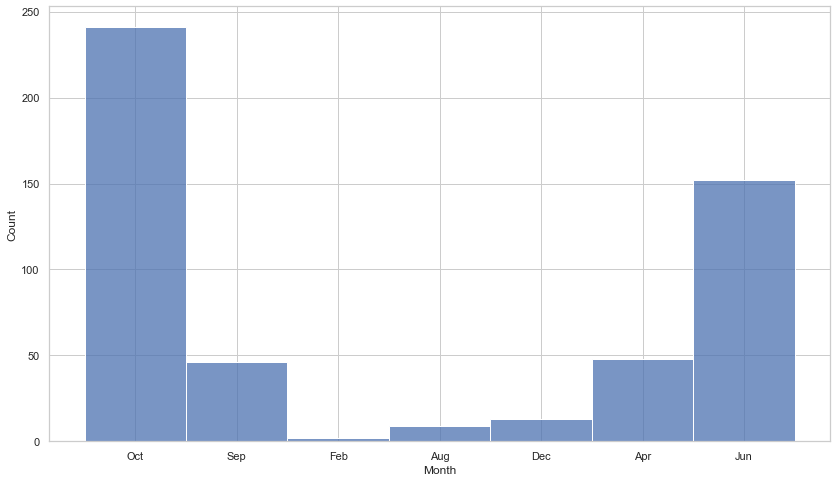

In [25]:
sns.histplot(x=df_no_may.Month)
#Excluyendo Mayo (Fuera de rango)

### HORA PARA HACER CIMA

Text(0.5, 1.0, 'Reaching Hours')

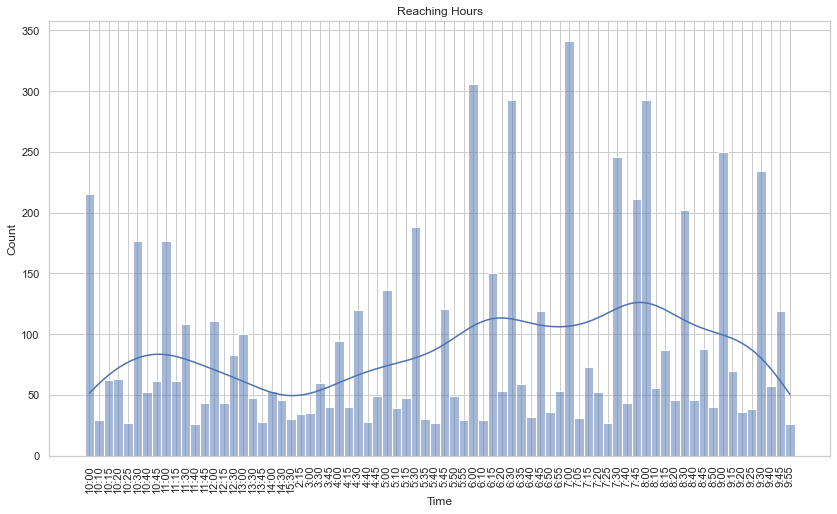

In [26]:
sns.histplot(data=df_Time_común1, x="Time", multiple="stack", kde=True)
plt.xticks(rotation=90);
plt.title('Reaching Hours')

### ALPINISTAS POR PAÍS DE ORIGEN

Text(0.5, 1.0, 'Summits')

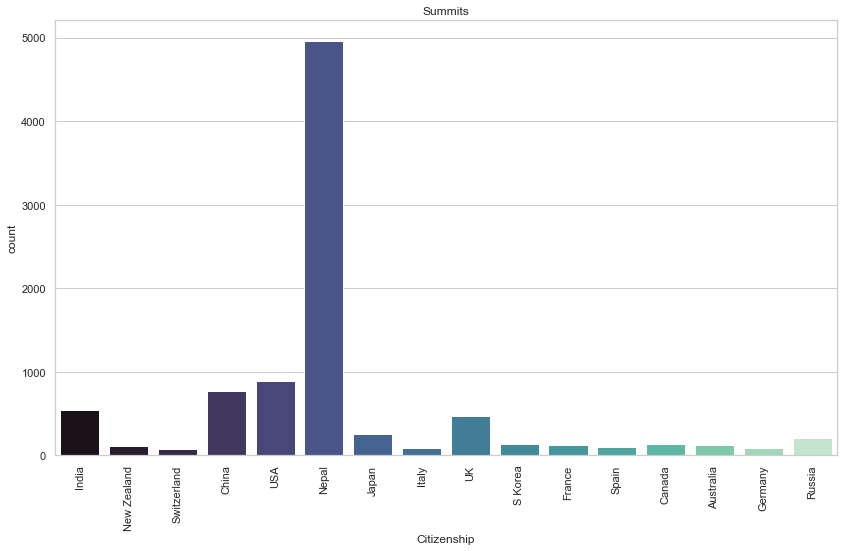

In [27]:
sns.countplot(x=df_citizenship_común.Citizenship, palette="mako")
plt.xticks(rotation=90);
plt.title('Summits')


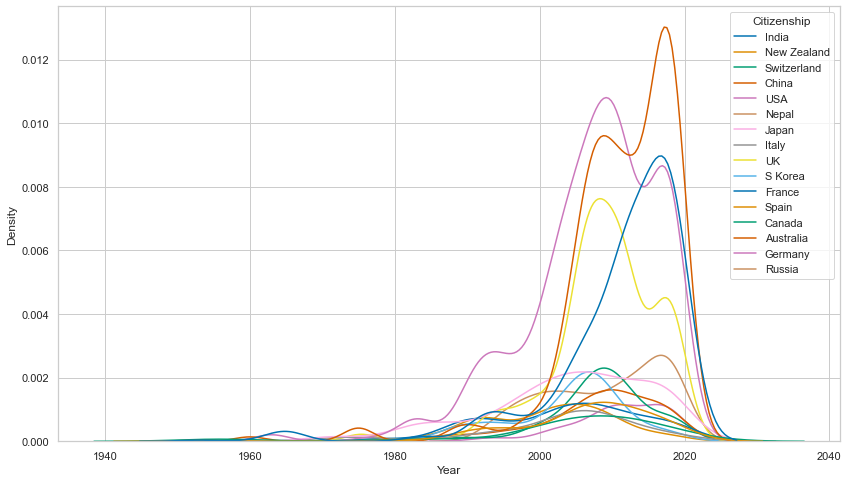

In [28]:
sns.kdeplot(x=df_citizenship_común1.Year, hue=df_citizenship_común.Citizenship, warn_singular=False, palette="colorblind");
# Excluyendo Nepal (Fuera de rango)

### ACCESO A LA CIMA

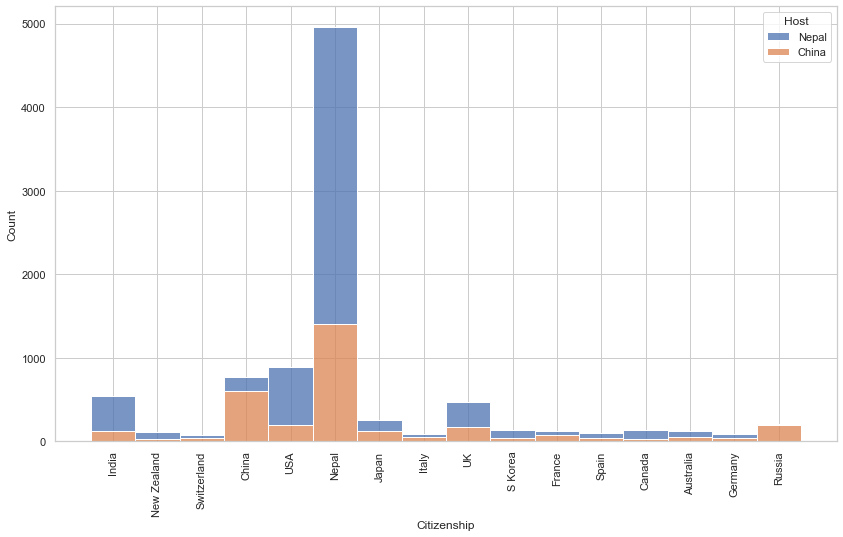

In [29]:
sns.histplot(data=df_citizenship_común, x="Citizenship", hue="Host", multiple="stack")
plt.xticks(rotation=90);